In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

dataset=load_dataset("lukebarousse/data_jobs")

df=dataset['train'].to_pandas()

df.info()



Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\jahna\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\ed776e5a0a8c40ea9d5efbd800772ae52e140f3e (last modified on Wed Sep  3 15:53:38 2025).


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   job_title_short        785741 non-null  object 
 1   job_title              785740 non-null  object 
 2   job_location           784696 non-null  object 
 3   job_via                785733 non-null  object 
 4   job_schedule_type      773074 non-null  object 
 5   job_work_from_home     785741 non-null  bool   
 6   search_location        785741 non-null  object 
 7   job_posted_date        785741 non-null  object 
 8   job_no_degree_mention  785741 non-null  bool   
 9   job_health_insurance   785741 non-null  bool   
 10  job_country            785692 non-null  object 
 11  salary_rate            33067 non-null   object 
 12  salary_year_avg        22003 non-null   float64
 13  salary_hour_avg        10662 non-null   float64
 14  company_name           785723 non-nu

Text(0.5, 1.0, 'Monthly Job Postings in India')

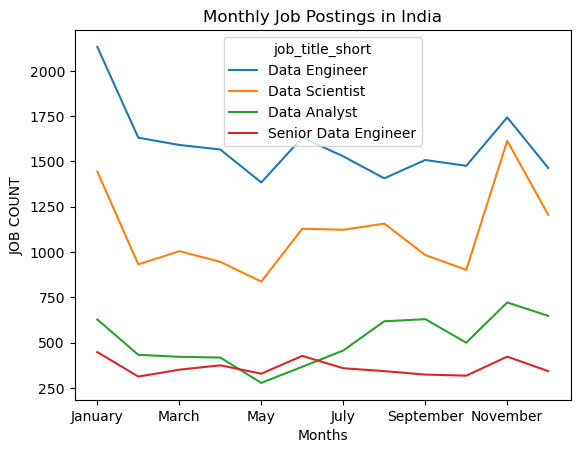

In [39]:
df['job_posted_date']=pd.to_datetime(df.job_posted_date)

df_india=df[df['job_country']=='India'].copy()
df_india['job_title_short'].unique()
df_india['job_posted_month']=df_india.job_posted_date.dt.strftime('%B')
job_title=df_india['job_title_short'].value_counts().head(4)
top_jobs=job_title.index.tolist()

# .size() = counts all the values containg or not containing na values 
df_india_pivot=df_india.pivot_table(index='job_posted_month', columns='job_title_short',aggfunc='size')
df_india_pivot.reset_index(inplace=True)
df_india_pivot['job_posted_month_no']=pd.to_datetime(df_india_pivot['job_posted_month'],format='%B').dt.month
df_india_pivot.sort_values('job_posted_month_no',inplace=True)
df_india_pivot.set_index('job_posted_month',inplace =True)
df_india_pivot.drop(columns='job_posted_month_no',inplace=True)

#plotting

df_india_pivot[top_jobs].plot(kind="line")
plt.xlabel('Months')
plt.ylabel('JOB COUNT')
plt.title("Monthly Job Postings in India")
